In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]="SimHei"
plt.rcParams["axes.unicode_minus"]=True
plt.style.use("seaborn")
fig_path="../latex/tex/figures/"
import seaborn as sns

In [3]:
data=pd.read_csv("data/data_1.csv")
data

,chest_ACC_x,chest_ACC_y,chest_ACC_z,chest_Resp,chest_ECG,wrist_ACC_x,wrist_ACC_y,wrist_ACC_z,wrist_BVP,wrist_TEMP,WEIGHT,Gender,AGE,HEIGHT,SKIN,SPORT,Rpeaks,Activity,Label,Subject
0,0.8564,-0.0678,-0.3656,4.441833,0.015610,-0.765625,-0.078125,0.671875,7.28,32.13,78.0,m,34,182.0,3,6,0,0,49.611369,S1
1,0.8514,-0.0654,-0.3688,4.876709,-0.015747,-0.765625,-0.078125,0.671875,-11.36,32.16,78.0,m,34,182.0,3,6,1,0,49.611369,S1
2,0.8514,-0.0662,-0.3708,3.340149,-0.008743,-0.765625,-0.078125,0.671875,-51.27,32.16,78.0,m,34,182.0,3,6,0,0,49.611369,S1
3,0.8594,-0.0632,-0.3640,0.740051,-0.339523,-0.750000,-0.078125,0.671875,5.65,32.16,78.0,m,34,182.0,3,6,0,0,49.611369,S1
4,0.8510,-0.0674,-0.3694,-1.475525,-0.089905,-0.765625,-0.078125,0.671875,34.34,32.16,78.0,m,34,182.0,3,6,0,0,49.611369,S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517951,0.8878,0.0122,-0.2330,2.789307,-0.281845,-0.468750,0.859375,0.093750,1.68,33.99,79.0,m,28,183.0,2,5,0,0,79.664230,S15
517952,0.8962,-0.0184,-0.2280,0.563049,0.075851,-0.609375,0.890625,0.265625,-16.38,33.99,79.0,m,28,183.0,2,5,1,0,79.664230,S15
517953,0.9010,0.0006,-0.2102,-1.075745,0.017166,-0.468750,0.531250,-0.562500,13.43,33.99,79.0,m,28,183.0,2,5,0,0,79.664230,S15
517954,0.8906,-0.0124,-0.2238,-2.117920,-0.304184,-0.375000,0.406250,-0.843750,-5.89,33.99,79.0,m,28,183.0,2,5,0,0,79.664230,S15


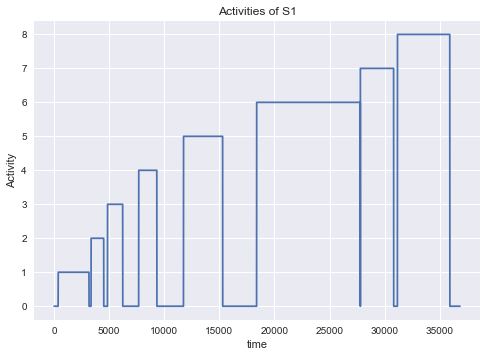

In [4]:
plt.plot(data.loc[data.Subject=="S1"].index,data.loc[data.Subject=="S1","Activity"])
plt.title("Activities of S1")
plt.xlabel("time")
plt.ylabel("Activity")
plt.savefig(fig_path+"Activity.eps",dpi=300)

In [5]:
dic_activity = {1: "Sitting", 2: "Stairs", 3: "Soccer", 4: "Cycling", 5: "Driving", 6: "Lunch", 7: "Walking", 8: "Working"}
signals=data.loc[data.Subject=="S1",:]

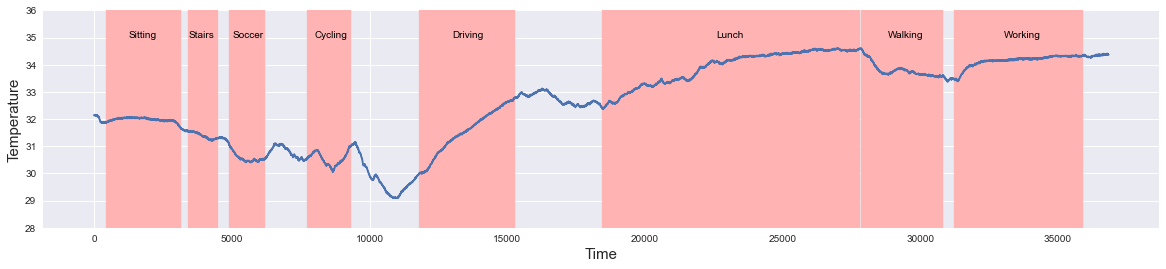

In [6]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 35, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1

ax.set_ylim(top = 36, bottom = 28)
signals.loc[:, 'wrist_TEMP'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Temperature", fontsize=15)
plt.savefig(fig_path+"Temperature of S1.eps",dpi=300)
plt.show()

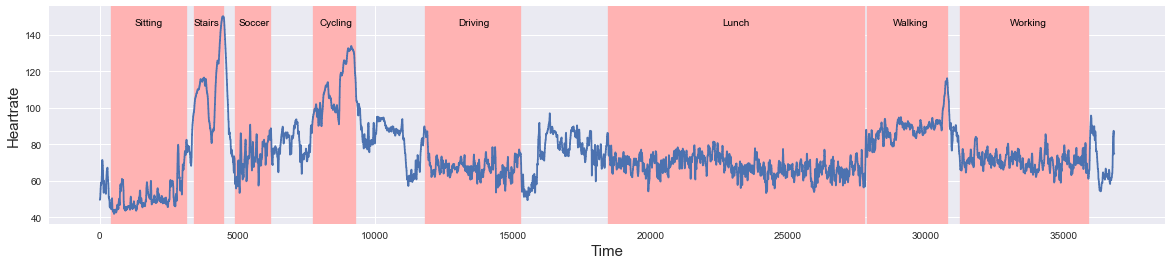

In [7]:
fig, ax = plt.subplots(figsize=(20, 4))
style = dict(size=10, color='k')

i = 0
x_start = 0
x_end = 0
while(i < len(signals.loc[:, 'Activity'])):
    sport_index = signals.loc[i, 'Activity']
    
    if(sport_index != 0):
        
        x_start = i
        while(i < len(signals.loc[:, 'Activity'])):
            if(signals.loc[i, 'Activity'] != sport_index):
                break
            
            else:
                i += 1
            
        x_end = i-1
        sport = dic_activity[sport_index]
        plt.axvspan(xmin=x_start + 60, xmax=x_end, color='#ffb3b3')
        ax.text((x_start+x_end)//2 - 500, 145, sport, **style)
        
        x_start = 0
        x_end = 0
    
    else :
        i += 1


signals.loc[:, 'Label'].plot(ax=ax)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Heartrate", fontsize=15)
plt.savefig(fig_path+"Heartrate of S1.eps",dpi=300)

## 看看没有时间序列信息的会怎么样

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


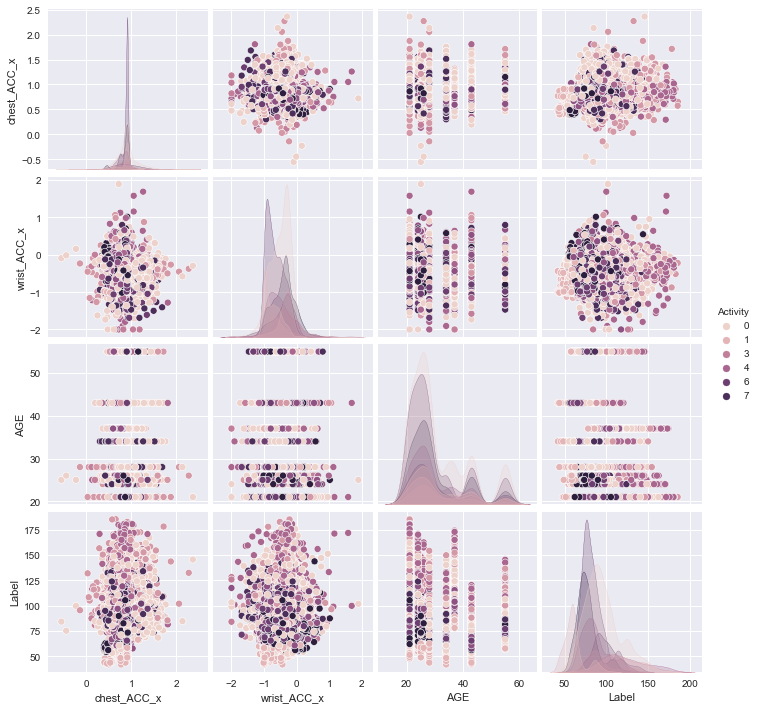

In [8]:
columns=["chest_ACC_x","wrist_ACC_x","AGE","Label","Activity"]
sns.pairplot(data=data.loc[:,columns].sample(10000),hue="Activity")
plt.savefig(fig_path+"散点图矩阵.eps",dpi=300)
plt.show()